<a href="https://colab.research.google.com/github/114576u/machine-learning/blob/master/IA_Notebook_2_Ataques_Adversarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IA Notebook 2 | Ataques adversarios**
from DotCSV: https://www.youtube.com/watch?v=JoQx39CoXW8


In [1]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


In [0]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [3]:
iv3 = InceptionV3()














96116736/96112376 [==============================] - 3s 0us/step


In [4]:
iv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [38]:
# check if the model works
from keras.preprocessing import image

# for this example, we need to get a photo of a cat and save into the portfolio
x = image.img_to_array(image.load_img("beer.jfif"))
print(x.shape)

# reshape because in InceptionV3 it has to be 299 x 299:
x = image.img_to_array(image.load_img("cat.jfif", target_size=(299, 299)))
# x = image.img_to_array(image.load_img("hacked_cat.png", target_size=(299, 299)))
print(x.shape)

# need to rescale the range 0..255 to -1..1 => change range
x /= 255
x -= 0.5
x *=2
# print(x)

# we need a tensor (multidimensional matrix) but for this we need firt to reshape adding a new dimension
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])
print(x.shape)

# we have now x as we need it, so we can start using
y = iv3.predict(x)

(158, 318, 3)
(299, 299, 3)
(1, 299, 299, 3)


In [39]:
y.shape
# this is a vector with 1000 different probability values

# to translate y to real names, we use below:
decode_predictions(y)

# note that 0.8 is a very high level of confidence about the cat

[[('n02123045', 'tabby', 0.8028636),
  ('n02124075', 'Egyptian_cat', 0.1503707),
  ('n02123159', 'tiger_cat', 0.023772834),
  ('n02808304', 'bath_towel', 0.00056696567),
  ('n02127052', 'lynx', 0.0004798273)]]

## Ataques adversarios
Confondre la xarxa neuronal de forma que obtingui resultats alterats
Podem alterar els pixels de la imatge d'entrada per a reduïr possibilitats d'encert

In [40]:
# get first layer = input node
input_layer = iv3.layers[0].input

# get output layer
output_layer = iv3.layers[-1].output

print(input_layer)
print(output_layer)

# we want the cat to be detected as a lemon, which is class 951
target_class = 951

# we want to maximize the presence of target_class
# we wnat target_class to be the maximized class
loss = output_layer[0, target_class]

# gradient is the process to calculate the flow from input to output (it's a graph)
grad = K.gradients(loss, input_layer)[0]

optimize_gradient = K.function([input_layer, K.learning_phase()], [grad, loss])

# remember x is the image of the cat
adv = np.copy(x)

# in a second round, we add limit to perturbation accepted, so the final image is looking as a real one
pert = 0.01
max_pert = x + pert
min_pert = x - pert

cost = 0.0
while cost < 0.95:
  gr, cost = optimize_gradient([adv, 0])
  adv += gr

  # once we have adv, we cap it up and down, so no value goes beyond pert and also, it sticks in -1..1 range
  adv = np.clip(adv, min_pert, max_pert)
  adv = np.clip(adv, -1, 1)

  print("Lemon cost:", cost)

hacked = np.copy(adv)

Tensor("input_1:0", shape=(?, 299, 299, 3), dtype=float32)
Tensor("predictions/Softmax:0", shape=(?, 1000), dtype=float32)
Lemon cost: 1.0537175e-05
Lemon cost: 1.0547961e-05
Lemon cost: 1.055909e-05
Lemon cost: 1.0570191e-05
Lemon cost: 1.0581415e-05
Lemon cost: 1.0592615e-05
Lemon cost: 1.0603885e-05
Lemon cost: 1.0615246e-05
Lemon cost: 1.06266525e-05
Lemon cost: 1.06381e-05
Lemon cost: 1.0649498e-05
Lemon cost: 1.0660949e-05
Lemon cost: 1.0672399e-05
Lemon cost: 1.06838825e-05
Lemon cost: 1.0695423e-05
Lemon cost: 1.0706911e-05
Lemon cost: 1.0718444e-05
Lemon cost: 1.0730019e-05
Lemon cost: 1.07416445e-05
Lemon cost: 1.0753383e-05
Lemon cost: 1.076505e-05
Lemon cost: 1.0776732e-05
Lemon cost: 1.0788412e-05
Lemon cost: 1.0800034e-05
Lemon cost: 1.0811659e-05
Lemon cost: 1.0823286e-05
Lemon cost: 1.0835083e-05
Lemon cost: 1.0846849e-05
Lemon cost: 1.0858678e-05
Lemon cost: 1.08704835e-05
Lemon cost: 1.08822205e-05
Lemon cost: 1.089406e-05
Lemon cost: 1.0905886e-05
Lemon cost: 1.09177

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


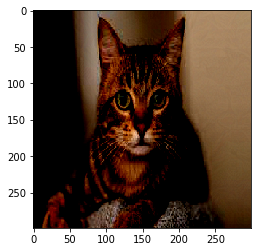

In [41]:
plt.imshow(adv[0])
# this image, if passed again to the model it will find a lemon in 99% of possibilities

In [0]:
# we can improve the image if we try to minimize perturbation

In [0]:
from PIL import Image
im = Image.fromarray(adv[0].astype(np.uint8))
im.save("hacked_cat.png")